In [47]:
!pip install kaggle



In [48]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [50]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset ,'r') as zip:
  zip.extractall()
  print("dataset extarcted")

dataset extarcted


In [52]:
!ls


data  face-mask-dataset.zip  no_mask.jpg  sample_data  test_mask.jpg


In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [54]:
with_mask_file=os.listdir('/content/data/with_mask')
with_out_mask_file=os.listdir('/content/data/without_mask')


In [55]:
print('number mask ',len(with_mask_file),"no mask",len(with_out_mask_file))

number mask  3725 no mask 3828


In [56]:
with_mask_label=[1]*3725
without_mask_label=[0]*3828

In [57]:
print(with_mask_label[0:5])

[1, 1, 1, 1, 1]


In [58]:
labels=with_mask_label+without_mask_label
print(len(labels))

7553


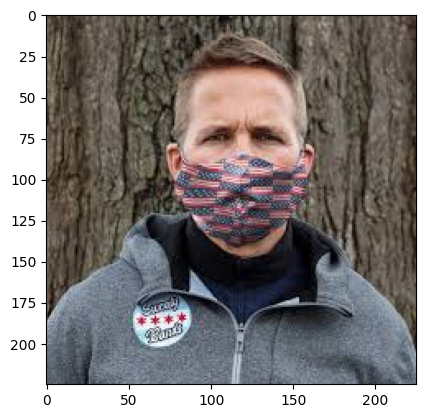

In [59]:
img=mpimg.imread('/content/data/with_mask/with_mask_2591.jpg')
imgplot=plt.imshow(img)
plt.show()

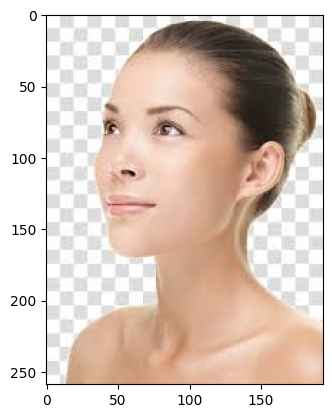

In [60]:
img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

In [61]:
with_mask_path='/content/data/with_mask/'
data=[]
without_mask_path='/content/data/without_mask/'
for img_file in with_mask_file:
  image=Image.open(with_mask_path+img_file)  #resizing the image
  image=image.resize((128,128))
  image=image.convert('RGB')  #converts to rgb color channel
  image=np.array(image)
  data.append(image)

for img_file in with_out_mask_file:
  image=Image.open(without_mask_path+img_file)  #resizing the image
  image=image.resize((128,128))
  image=image.convert('RGB')  #converts to rgb color channel
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [62]:
length=len(data)
print(data[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [63]:
type(data[0])
data[0].shape

(128, 128, 3)

In [64]:
x=np.array(data)
y=np.array(labels)

In [65]:
type(x)

numpy.ndarray

In [66]:
type(y)
print(y.shape)
x.shape
print(y)

(7553,)
[1 1 1 ... 0 0 0]


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
print(x.shape)
print(x_test.shape)

(7553, 128, 128, 3)
(1511, 128, 128, 3)


In [69]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [70]:
x_train_scaled[0]

array([[[0.81176471, 0.90980392, 0.98823529],
        [0.80784314, 0.90588235, 0.98431373],
        [0.80784314, 0.90588235, 0.98431373],
        ...,
        [0.39215686, 0.44313725, 0.29411765],
        [0.14117647, 0.18823529, 0.03921569],
        [0.14509804, 0.19215686, 0.04313725]],

       [[0.81176471, 0.90980392, 0.98823529],
        [0.81176471, 0.90980392, 0.98823529],
        [0.81176471, 0.90980392, 0.98823529],
        ...,
        [0.37647059, 0.42352941, 0.27058824],
        [0.14901961, 0.19607843, 0.04313725],
        [0.21960784, 0.26666667, 0.11372549]],

       [[0.81176471, 0.90980392, 0.98823529],
        [0.81568627, 0.91372549, 0.99215686],
        [0.81568627, 0.91372549, 0.99215686],
        ...,
        [0.36470588, 0.40784314, 0.24705882],
        [0.20392157, 0.24705882, 0.09019608],
        [0.27058824, 0.31372549, 0.15294118]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [71]:
#building cnn
import tensorflow as tf
from tensorflow import keras


number_of_class=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3))) # 3 for rgb
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu')) # 3 for rgb
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #important layer  2d to 1d
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(number_of_class,activation='sigmoid'))#softmoid used multiple class






/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [46]:
# training
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.9914 - loss: 0.0245 - val_acc: 0.9322 - val_loss: 0.2873
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.9877 - loss: 0.0286 - val_acc: 0.9372 - val_loss: 0.3749
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9894 - loss: 0.0329 - val_acc: 0.9455 - val_loss: 0.3959
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9902 - loss: 0.0234 - val_acc: 0.9372 - val_loss: 0.3275
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9859 - loss: 0.0370 - val_acc: 0.9388 - val_loss: 0.4200


In [73]:
#model valaution
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print("test accuracy ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.5545 - loss: 0.6891
test accuracy  0.5625413656234741


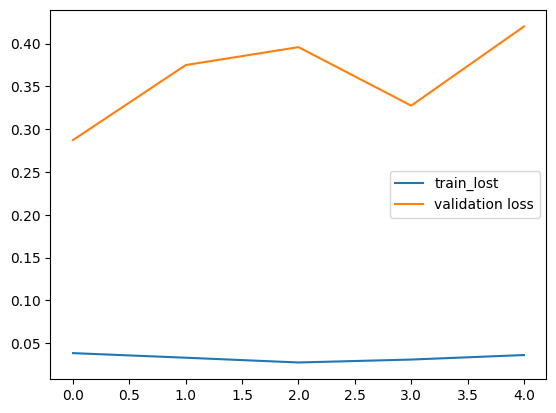

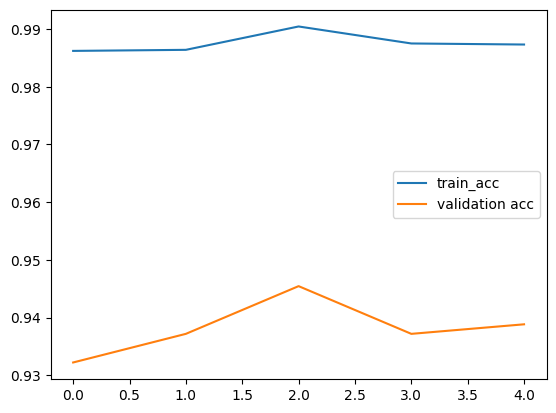

In [74]:
h=history
plt.plot(h.history['loss'],label='train_lost')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()



plt.plot(h.history['acc'],label='train_acc')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

path of the image to be predicted/content/no_mask.jpg


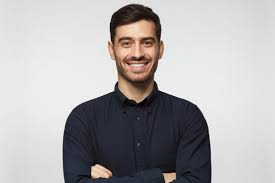

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[[0.4922803  0.48730224]]
0
mask is not wearing


In [75]:
input_image_path=input('path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_img_reshape=np.reshape(input_image_scaled,[1,128,128,3])
input_predict=model.predict(input_img_reshape)
print(input_predict)
input_pred_label=np.argmax(input_predict) #convert to respective label 1 for mask -0 for no mask y is label
print(input_pred_label)
if(input_pred_label==1):
  print("mask is wearing")
else:
   print("mask is not wearing")



path of the image to be predicted/content/no_mask.jpg


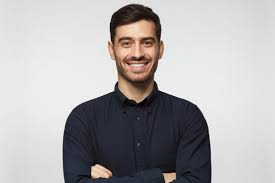

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.4922803  0.48730224]]
0
mask is not wearing


In [79]:
input_image_path=input('path of the image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_img_reshape=np.reshape(input_image_scaled,[1,128,128,3])
input_predict=model.predict(input_img_reshape)
print(input_predict)
input_pred_label=np.argmax(input_predict) #convert to respective label 1 for mask -0 for no mask y is label
print(input_pred_label)
if(input_pred_label==1):
  print("mask is wearing")
else:
   print("mask is not wearing")

In [80]:
git init
git add .
git commit -m "first commit"
git branch -M main

SyntaxError: invalid syntax (<ipython-input-80-158671ca09fb>, line 1)

In [ ]:
git remote add origin https://github.com/najahaboobackar/face_mask_detection.git